In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
data.isnull().any()

animal name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
type           False
dtype: bool

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
type           101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
data = data.iloc[:,1:]
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import train_test_split

In [7]:
train,test = train_test_split(data,test_size=0.2)

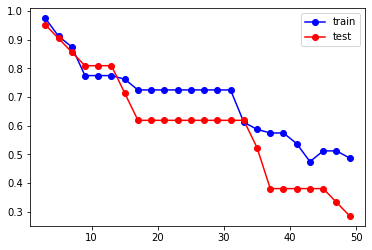

In [8]:
acc=[]
for i in range(3,50,2):
    model = KNC(n_neighbors=i)
    model.fit(train.iloc[:,0:16],train.iloc[:,16])
    train_acc = np.mean(model.predict(train.iloc[:,0:16])==train.iloc[:,16])
    test_acc = np.mean(model.predict(test.iloc[:,0:16])==test.iloc[:,16])
    acc.append([train_acc,test_acc])
    
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"bo-")

# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"ro-")

plt.legend(["train","test"])

In [9]:
model_final = KNC(n_neighbors=5)
model_final.fit(train.iloc[:,0:16],train.iloc[:,16])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
acc = np.mean(model_final.predict(test.iloc[:,0:16])==test.iloc[:,16])*float(100)
print(acc)

90.47619047619048


In [11]:
pred = model.predict(test.iloc[:,0:16])

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
print(confusion_matrix(test.iloc[:,16],pred))

[[5 0 0 0 0 0]
 [5 1 0 0 0 0]
 [0 2 0 0 0 0]
 [1 0 0 0 0 0]
 [4 0 0 0 0 0]
 [2 1 0 0 0 0]]


In [14]:
print(classification_report(test.iloc[:,16],pred))

              precision    recall  f1-score   support

           1       0.29      1.00      0.45         5
           2       0.25      0.17      0.20         6
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         3

    accuracy                           0.29        21
   macro avg       0.09      0.19      0.11        21
weighted avg       0.14      0.29      0.17        21



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
